# Fisher线性判别大作业

#### 摘要：

        当对大量数据进行处理时，希望通过找到一个合适的分类方法，将其中不同数据进行区分。我们希望设计合适的判别函数，以便通过计算的方法实现分类，由此让计算机“学会”对样本分类。其中，我们可以根据判别函数的不同，将方法分为线性判别和非线性判别。本文主要的工作是基于Iris和sonar两个数据集实现了fisher线性判别。
        本文中采取了搜索的方法，通过对比不同阈值的分类正确率来判断分类阈值的好坏，并选取其中最优的作为最终的分类阈值。
        1,对于Iris数据集：Iris数据集中的每一个样本的维度较低，仅具有四个特征值。本文根据fisher的方法，将数据降维为一维，即将数据的投影到一个一维空间中。由于有三类数据，在实际操作中，我们可以采用“两两分类”的方法对样本进行分类学习。
        2，对于sonar数据集：Sonar是一个二分问题。但是和Iris数据集相比，sonar的维度很高，我们考虑将样本特征向量投影到二维或三维空间进行求解。


## 1. fisher判别的基本原理:

  现在我们有数据$X$，其中有了$n$个样本，其中每个样本$X=\lbrace x_1,x_2,......x_n\rbrace$其中包含了$n$个特征用来共同描述样本。若其中$n_1$个属于$\omega_1$类的样本记为$X_1=\lbrace x_1,x_2,......x_n\rbrace$,$n_2$个属于$\omega_2$类的样本记为$X_2=\lbrace x_1,x_2,......x_n\rbrace$

   各类样本的均值：
        $$μ_i=\frac{∑𝑥_j}{N}$$

各类类内离散度矩阵：
    $$ S_i=∑x_j=U_j(x_j-μ_i)(x_j-μ_i)^T $$

总类内离散度矩阵：
    $$ S_w=S_1+S_2$$

     现在，Fisher线性判别的作用就是将两个样本分离。为了解决这个问题，我们引入一个投影方向，用这个向量沿这个方向的投影的位置来描述样本的所具有的可分类的特征。这样，我们可以将一个高维的样本映射到一个相对低维的空间，从而解决了维数问题。由此，在分类之前，最重要的是通过训练样本，找到一个性能优良的分类“方向”。
     fisher判别是按照各类中的方差尽可能的小，不同类之间的均值相差程度尽可能的大的为原则。即基于的是类间离散度最大而内类离散度最小的原则。由此我们可以设计判别函数：

$$maxf(x)=\frac{x^T  (μ_1-μ_2)^2}{(∑x_1^2+∑x_2^2 )}$$

为了考虑计算问题，我们可以将公式进一步化简，其中$(μ1−μ2)^2$可以化简为，${w^T}S_b{w}$

其中，$S_i^2={w^T}S_i{w}$

我们可以得到Rayleigh商：
    $$maxJ_F(w)=\frac{{w^T}S_b{w}}{{w^T}S_i{w}}$$

为了让$J_F(w)$函数获得最大值，我们可以对它引入拉格朗日乘子：
    $$L(w,λ)={w^T}S_b{w}-λ({w^T}S_w{w}-c)$$

对上式进行求导，当导数为0时的$w^*$就是我们要求的最优解：
$$w^*=S_w^{-1}(μ_1-μ_2)$$

此时的$w^*$就是导数为零的解

## 2. K折交叉验证

        K折交叉验证，将数据集等比例划分成K份，以其中的一份作为测试数据，其他的K-1份数据作为训练数据。进行一次实验，K折交叉验证只有实验K次才算完成完整的一次；交叉验证就是将实验重复K次，每次实验都是从K个部分选取一份不同的数据部分作为测试数据，剩下的K-1个当作训练数据，最后把得到的K个实验结果进行平分。
        我们采用K折交叉的方法对数据进行预处理，将数据分为n个包，其中1个为测试集n-1个训练集。我们首先选取sonar数据集进行计算，每次训练开始前将数据进行乱序处理。然后在其中，选取测试集和训练集。然后重复n次。以最后的综合正确率作为实验的正确率。

## 3. $y_0$的选取：

        上文中，我们仅仅找到了合适的分类方向，但是在具体的操作中，我们需要设置合适的阈值，通过比较结果和阈值来进行判断，其中的一种方法是通过先验知识来直接计算。但是这样做有天然的劣势，直接根据样本信息计算分类标准可能不会很好的进行分类，但是，我们通过搜索的方法，“找出”合适的判别标准

我们可以根据$y$值的取值范围选取一个阈值$y_0$的合理区间$[a,b]$,根据我们计算出的$y$值在区间内寻找一个能使分类结果最优的$y_0$作为分类标准

  $*$ 主要代码在后面，这里仅展示画图

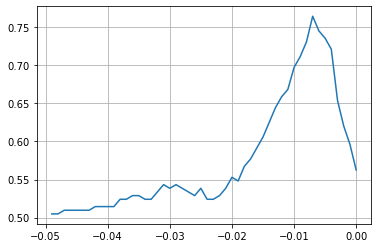

In [10]:
plt.plot(y_0,acc_1)
plt.grid(1)
plt.show()
#代码中acc_1保存了不同的 𝑦0 对应的分类正确率

根据图表，我们可以发现，当$y_0$取-0.007附近的值时，分类正确率最高
       

## 4.程序设计(以sonar为例)

$*$此处代码仅仅用来说明设计流程，可运行代码块在最后

In [ ]:
import pandas as pd
import numpy as np
from numpy import append
import matplotlib.pyplot as plt

file = pd.read_csv('sonar.csv')
original_data=file.values[0:208,0:60]
np.random.shuffle(original_data)
w_y=0.0                      #分类标准y_0
y_plt_1=[]
y_plt_2=[]
acc_1 = []                   #保存了不同的 𝑦0 对应的分类正确率
y_0=[]

导入相关的包&定义全局变量

In [ ]:
    #定义两类训练样本和测试样本
    train_data = np.zeros((208, 60), dtype=float)
    train_data_1 = np.zeros((0, 60), dtype=float)
    train_data_2 = np.zeros((0, 60), dtype=float)
    test_data = np.zeros((0, 0), dtype=float)

    #两类样本的均值
    e_1 = np.zeros(60, dtype=float)
    e_2 = np.zeros(60, dtype=float)

    #定义了类内离散度
    s_train_data_1 = np.zeros((60, 60), dtype=float)
    s_train_data_2 = np.zeros((60, 60), dtype=float)
    s_w = np.zeros((60, 60))

    s_w_inv = np.zeros((60, 60))
    W = np.zeros(60)
    adder_1 = 0                     #正确分类计数器
    adder_2 = 0
    k = 8                           #定义了K折交叉验证中的分组的个数，可以手动改
    bag_size = int(208 / k)

定义两类训练样本和测试样本，以及各部分的均值和类内离散度

In [ ]:
for i in range(k):
        test_data = original_data[i * bag_size:i * bag_size + bag_size]
        train_data = np.delete(original_data, range(i * bag_size, i * bag_size + bag_size - 1), axis=0)
        s_train_data_1 = np.zeros((60, 60), dtype=float)
        s_train_data_2 = np.zeros((60, 60), dtype=float)

        for row in range(len(train_data)):
            if int(train_data[row, 0]) == 1:
                b = np.zeros([60])
                b = [train_data[row]]
                train_data_1 = np.insert(train_data_1, 0, values=b, axis=0)


            else:
                b = np.zeros([60])
                b = [train_data[row]]
                train_data_2 = np.insert(train_data_2, 0, values=b, axis=0)
        if len(train_data_1) != 0:
            e_1 = np.mean(train_data_1, axis=0)
        if len(train_data_2) != 0:
            e_2 = np.mean(train_data_2, axis=0)
        for i in range(len(train_data_1)):
            a = train_data_1[i] - e_1
            a = np.array([a])
            b = a.T
            s_train_data_1 = s_train_data_1 + np.dot(b, a)
        for i in range(len(train_data_2)):
            c = train_data_2[i] - e_2
            c = np.array([c])
            d = c.T
            s_train_data_2 = s_train_data_2 + np.dot(d, c)

   这段代码，在每次循环开始，进行一次数据的重新选取，从以及打乱顺序的数据中重新选取训练集和测试集。
   通过调用numpy中的mean方法直接计算训练样本的均值，然后用循环的方式，计算出类内离散度

In [ ]:
  s_w = s_train_data_1 + s_train_data_2 #总类内离散度矩阵
        b = np.zeros([59, 59])
        b = np.delete(s_w, 0, axis=0)
        b = np.delete(b, 0, axis=1)
        s_w_inv = np.linalg.inv(b)
        b_1 = np.array(e_1[1:])
        b_2 = np.array(e_2[1:])
        W = np.dot(s_w_inv, (b_1 - b_2))


这段代码计算出了：总类内离散度矩阵，以及总类内离散度的逆；并根据公式计算出$w^*$（代码中的W）

In [ ]:
 for i in range(len(test_data)):
            b = test_data[i]
            c = np.array(b[1:])
            W=W.T
            y = np.dot(W, c)

            if y > -w_y:
                if int(b[0]) == 1:
                    adder_1 += 1
                    y_plt_1.append(y)
            elif y < -w_y:
                if int(b[0]) == 2:
                    adder_1 += 1
                    y_plt_2.append(y)

这段代码是测试代码，adder_1变量记录了测试成功的次数。

In [ ]:
acc_1.append(adder_1/208) #计算并保存正确率

$*$以上代码均用作说明

## 6.结果展示

#### sonar:

取y_0=-0.007（手动修改最后代码最外层循环次数=1，w_y=0.007）两种分类对用的均值

In [16]:
np.mean(y_plt_1),np.mean(y_plt_2)

(-0.0019763583046630284, -0.020202681359558605)

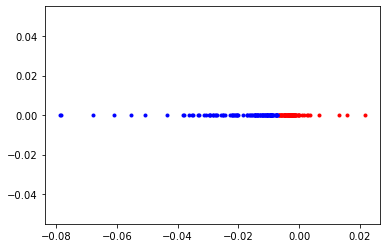

In [18]:
y1=np.zeros((len(y_plt_1)))
y2=np.zeros((len(y_plt_2)))
plt.scatter(y_plt_1, y1,c='red', alpha=1, marker='.')
plt.scatter(y_plt_2, y2,c='blue', alpha=1, marker='.')
plt.show()

其中一次的分类效果

In [26]:
print("当K=8时最好分类正确率:")
print(max(acc_1))

当K=8时最好分类正确率:
0.8076923076923077


#### Iris

In [29]:
print("第一类和二类的分类准确率为:%.3f"%(Accuracy12))
print("第一类和三类的分类准确率为:%.3f"%(Accuracy13))
print("第二类和三类的分类准确率为:%.3f"%(Accuracy23))

第一类和二类的分类准确率为:1.000
第一类和三类的分类准确率为:1.000
第二类和三类的分类准确率为:0.970


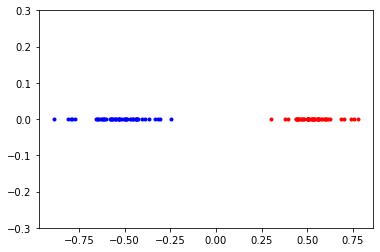

In [31]:
y1 = np.zeros(50)
y2 = np.zeros(50)
plt.figure(1)
plt.ylim((-0.3,0.3))          
plt.scatter(G121, y1,c='red', alpha=1, marker='.')
plt.scatter(G122, y2,c='b', alpha=1, marker='.')
plt.show()


$样本分离情况$

#### 5.可以运行的代码：

In [13]:
import pandas as pd
import numpy as np
from numpy import append
import matplotlib.pyplot as plt

file = pd.read_csv('sonar.csv')
original_data=file.values[0:208,0:60]
np.random.shuffle(original_data)
w_y=0.0 #分类标准y_0
y_plt_1=[]
y_plt_2=[]
acc_1 = []#保存了不同的 𝑦0 对应的分类正确率
y_0=[]

for i in range(1):#定义搜索次数
    w_y=0.007

    train_data = np.zeros((208, 60), dtype=float)
    train_data_1 = np.zeros((0, 60), dtype=float)
    train_data_2 = np.zeros((0, 60), dtype=float)
    test_data = np.zeros((0, 0), dtype=float)

    e_1 = np.zeros(60, dtype=float)
    e_2 = np.zeros(60, dtype=float)

    s_train_data_1 = np.zeros((60, 60), dtype=float)
    s_train_data_2 = np.zeros((60, 60), dtype=float)
    s_w = np.zeros((60, 60))

    s_w_inv = np.zeros((60, 60))
    W = np.zeros(60)
    adder_1 = 0
    adder_2 = 0
    k = 8
    bag_size = int(208 / k)
    for i in range(k):
        test_data = original_data[i * bag_size:i * bag_size + bag_size]
        train_data = np.delete(original_data, range(i * bag_size, i * bag_size + bag_size - 1), axis=0)
        s_train_data_1 = np.zeros((60, 60), dtype=float)
        s_train_data_2 = np.zeros((60, 60), dtype=float)

        for row in range(len(train_data)):
            if int(train_data[row, 0]) == 1:
                b = np.zeros([60])
                b = [train_data[row]]
                train_data_1 = np.insert(train_data_1, 0, values=b, axis=0)


            else:
                b = np.zeros([60])
                b = [train_data[row]]
                train_data_2 = np.insert(train_data_2, 0, values=b, axis=0)
        if len(train_data_1) != 0:
            e_1 = np.mean(train_data_1, axis=0)
        if len(train_data_2) != 0:
            e_2 = np.mean(train_data_2, axis=0)
        for i in range(len(train_data_1)):
            a = train_data_1[i] - e_1
            a = np.array([a])
            b = a.T
            s_train_data_1 = s_train_data_1 + np.dot(b, a)
        for i in range(len(train_data_2)):
            c = train_data_2[i] - e_2
            c = np.array([c])
            d = c.T
            s_train_data_2 = s_train_data_2 + np.dot(d, c)
        s_w = s_train_data_1 + s_train_data_2
        b = np.zeros([59, 59])
        b = np.delete(s_w, 0, axis=0)
        b = np.delete(b, 0, axis=1)
        s_w_inv = np.linalg.inv(b)
        b_1 = np.array(e_1[1:])
        b_2 = np.array(e_2[1:])
        W = np.dot(s_w_inv, (b_1 - b_2))

        for i in range(len(test_data)):
            b = test_data[i]
            c = np.array(b[1:])
            W=W.T
            y = np.dot(W, c)

            if y > -w_y:
                if int(b[0]) == 1:
                    adder_1 += 1
                    y_plt_1.append(y)
            elif y < -w_y:
                if int(b[0]) == 2:
                    adder_1 += 1
                    y_plt_2.append(y)
    acc_1.append(adder_1/208)
    y_0.append(-w_y)
#plt.plot(y_0,acc_1)
#plt.grid(1)
#plt.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def Fisher(X1,X2,n,c):
    
    # 计算三类样本的类均值向量
    m1=(np.mean(X1,axis = 0))
    m2=(np.mean(X2,axis = 0))
    m1 = m1.reshape(n,1)   
    m2 = m2.reshape(n,1)

    #计算类内离散度矩阵
    S1 = np.zeros((n,n))            
    S2 = np.zeros((n,n))             
    if c == 0:                     
        for i in range(0,49):
            S1 += (X1[i].reshape(n,1)-m1).dot((X1[i].reshape(n,1)-m1).T)
        for i in range(0,50):
            S2 += (X2[i].reshape(n,1)-m2).dot((X2[i].reshape(n,1)-m2).T)
    if c == 1:
        for i in range(0,50):
            S1 += (X1[i].reshape(n,1)-m1).dot((X1[i].reshape(n,1)-m1).T)
        for i in range(0,49):
            S2 += (X2[i].reshape(n,1)-m2).dot((X2[i].reshape(n,1)-m2).T)
    #计算总类内离散度矩阵S_w
    S_w = S1 + S2

    #计算最优投影方向 W
    W = np.linalg.inv(S_w).dot(m1 - m2)
    #在投影后的一维空间求两类的均值
    m_1 = (W.T).dot(m1)
    m_2 = (W.T).dot(m2)
    
    #计算分类阈值 W0(为一个列向量)
    W0 = -0.5*(m_1 + m_2)
    
    return W,W0

def Classify(X,W,W0):
    y = (W.T).dot(X) + W0
    return y


#导入sonar.all-data数据集
iris = pd.read_csv('iris(1).csv',header=None,sep=',')
iris1 = iris.iloc[0:150,0:4]
iris2 = np.mat(iris1)

Accuracy = 0
accuracy_ = np.zeros(10)
   

P1 = iris2[0:50,0:4]
P2 = iris2[50:100,0:4]
P3 = iris2[100:150,0:4]
    
G121 = np.ones(50)
G122 = np.ones(50)
G131 = np.zeros(50)
G132 = np.zeros(50)
G231 = np.zeros(50)
G232 = np.zeros(50)
   
# 留一法验证准确性
# 第一类和第二类的线性判别
count = 0
for i in range(100):
    if i <= 49:
        test = P1[i]
        test = test.reshape(4,1)
        train = np.delete(P1,i,axis=0)       # 训练样本是一个列数为t的矩阵
        W,W0 = Fisher(train,P2,4,0)
        if (Classify(test,W,W0)) >= 0:
            count += 1
            G121[i] = Classify(test,W,W0)
    else:
        test = P2[i-50]
        test = test.reshape(4,1)
        train = np.delete(P2,i-50,axis=0)
        W,W0 = Fisher(P1,train,4,1)
        if (Classify(test,W,W0)) < 0:
            count += 1
            G122[i-50] = Classify(test,W,W0)
Accuracy12 = count/100

# 第一类和第三类的线性判别
count = 0
for i in range(100):
    if i <= 49:
        test = P1[i]
        test = test.reshape(4,1)
        train = np.delete(P1,i,axis=0)       # 训练样本是一个列数为t的矩阵
        W,W0 = Fisher(train,P3,4,0)
        if (Classify(test,W,W0)) >= 0:
            count += 1
            G131[i] = Classify(test,W,W0)
    else:
        test = P3[i-50]
        test = test.reshape(4,1)
        train = np.delete(P3,i-50,axis=0)
        W,W0 = Fisher(P1,train,4,1)
        if (Classify(test,W,W0)) < 0:
            count += 1
            G132[i-50] = Classify(test,W,W0)

Accuracy13 = count/100


# 第二类和第三类的线性判别
count = 0
for i in range(100):
    if i <= 49:
        test = P2[i]
        test = test.reshape(4,1)
        train = np.delete(P2,i,axis=0)       # 训练样本是一个列数为t的矩阵
        W,W0 = Fisher(train,P3,4,0)
        if (Classify(test,W,W0)) >= 0:
            count += 1
            G231[i] = Classify(test,W,W0)
    else:
        test = P3[i-50]
        test = test.reshape(4,1)
        train = np.delete(P3,i-50,axis=0)
        W,W0 = Fisher(P2,train,4,1)
        if (Classify(test,W,W0)) < 0:
            count += 1
            G232[i-50] = Classify(test,W,W0)

Accuracy23 = count/100
